In [3]:
import pandas as pd
import numpy as np


file_path = r"C:\Users\isaac\Documents\Pst&b\Bootcamp\S3\J2\globalpowerplantdatabasev130\global_power_plant_database.csv"
df = pd.read_csv(file_path, encoding='utf-8')

print("🔍 Aperçu du dataset :")
print(df.head())

print(f"\n🔢 Dimensions : {df.shape[0]} lignes, {df.shape[1]} colonnes")


print("\n🧾 Colonnes disponibles :")
print(df.columns.tolist())

print("\n🚨 Valeurs manquantes par colonne :")
print(df.isnull().sum())


print("\n📊 Types de données :")
print(df.dtypes)



🔍 Aperçu du dataset :
  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \


C:\Users\isaac\AppData\Local\Temp\ipykernel_58356\1699262679.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8')


In [4]:

print("📊 Statistiques descriptives des colonnes numériques :")
print(df.describe())


print("\n📈 Statistiques sur la capacité des centrales :")
print(f"Moyenne : {df['capacity_mw'].mean():.2f} MW")
print(f"Médiane : {df['capacity_mw'].median():.2f} MW")
print(f"Écart-type : {df['capacity_mw'].std():.2f} MW")

print("\n🌍 Répartition des centrales par pays (Top 10) :")
print(df['country_long'].value_counts().head(10))


print("\n🔥 Répartition des types de combustibles :")
print(df['primary_fuel'].value_counts())


📊 Statistiques descriptives des colonnes numériques :
        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        17447.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           23.397835   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1988.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2014.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           14887.000000          6417.000000          7226.000000   
mean             2018.218849           592.696107           656.863891   
std                 1.606428          2174.833482          2231.464288   
min       

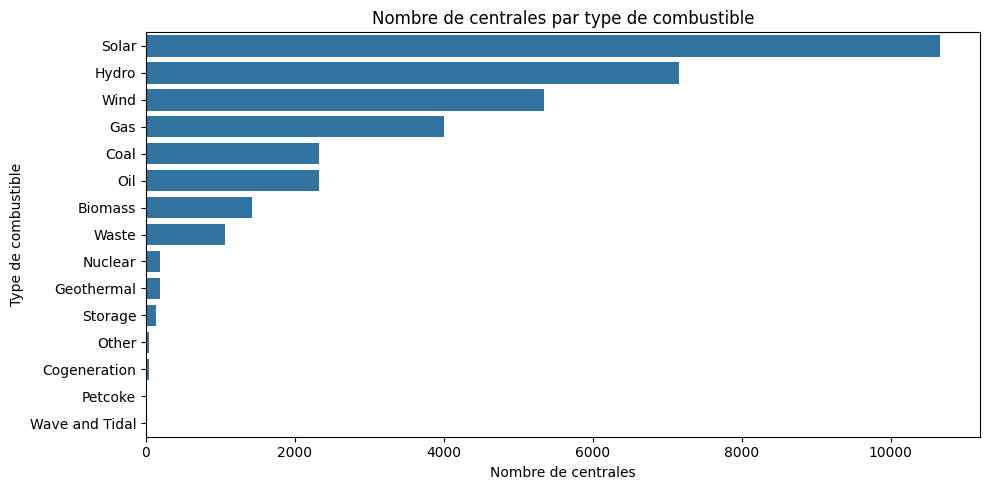

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(y='primary_fuel', data=df, order=df['primary_fuel'].value_counts().index)
plt.title("Nombre de centrales par type de combustible")
plt.xlabel("Nombre de centrales")
plt.ylabel("Type de combustible")
plt.tight_layout()
plt.show()

In [6]:
import numpy as np

coal = df[df['primary_fuel'] == 'Coal']['capacity_mw'].dropna()
gas = df[df['primary_fuel'] == 'Gas']['capacity_mw'].dropna()

print("⚡ Statistiques - centrales au charbon :")
print(f"Moyenne : {np.mean(coal):.2f} MW")
print(f"Médiane : {np.median(coal):.2f} MW")
print(f"Écart-type : {np.std(coal):.2f} MW")

print("\n⚡ Statistiques - centrales à gaz :")
print(f"Moyenne : {np.mean(gas):.2f} MW")
print(f"Médiane : {np.median(gas):.2f} MW")
print(f"Écart-type : {np.std(gas):.2f} MW")


⚡ Statistiques - centrales au charbon :
Moyenne : 843.58 MW
Médiane : 600.00 MW
Écart-type : 888.00 MW

⚡ Statistiques - centrales à gaz :
Moyenne : 373.45 MW
Médiane : 147.50 MW
Écart-type : 560.86 MW


In [7]:
diff = np.mean(coal) - np.mean(gas)
print(f"\n📉 Différence moyenne de production (Charbon - Gaz) : {diff:.2f} MW")


threshold = 2 * (np.std(gas) / np.sqrt(len(gas)))

if diff > threshold:
    print("✅ Il est probable que le charbon produise significativement plus que le gaz.")
else:
    print("❌ Aucune différence significative nette détectée.")


📉 Différence moyenne de production (Charbon - Gaz) : 470.13 MW
✅ Il est probable que le charbon produise significativement plus que le gaz.


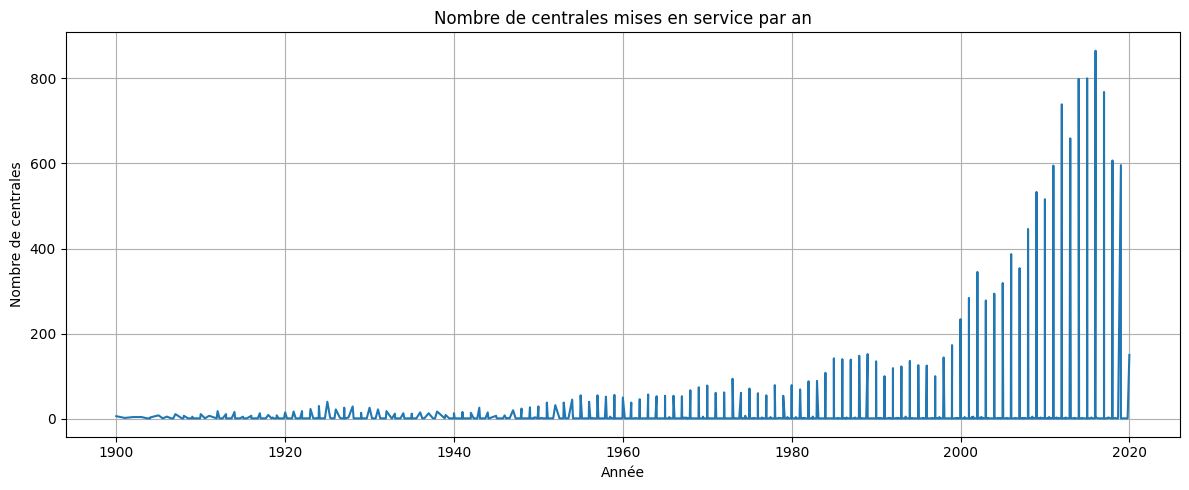

In [8]:

df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')


df_year = df[(df['commissioning_year'].notnull()) & (df['commissioning_year'] >= 1900)]

commissioning_counts = df_year['commissioning_year'].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
commissioning_counts.plot(kind='line')
plt.title("Nombre de centrales mises en service par an")
plt.xlabel("Année")
plt.ylabel("Nombre de centrales")
plt.grid(True)
plt.tight_layout()
plt.show()


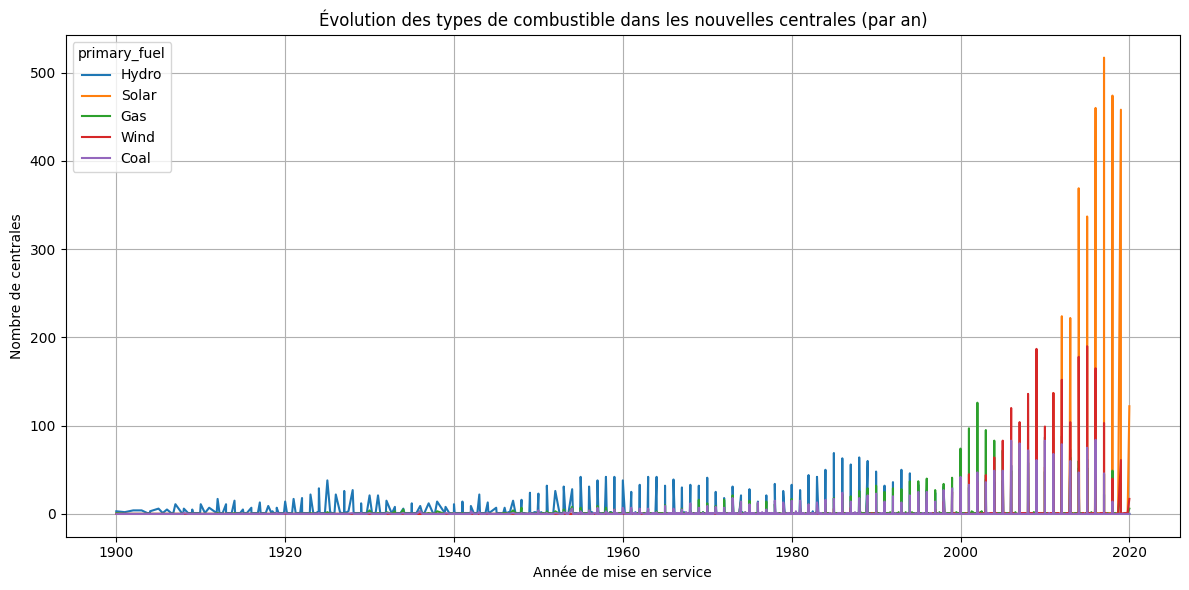

In [9]:

fuel_year = df_year.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)


fuel_year = fuel_year.loc[:, fuel_year.sum().sort_values(ascending=False).head(5).index]


fuel_year.plot(figsize=(12, 6))
plt.title("Évolution des types de combustible dans les nouvelles centrales (par an)")
plt.xlabel("Année de mise en service")
plt.ylabel("Nombre de centrales")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\isaac\AppData\Local\Temp\ipykernel_58356\42790223.py:27: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\isaac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


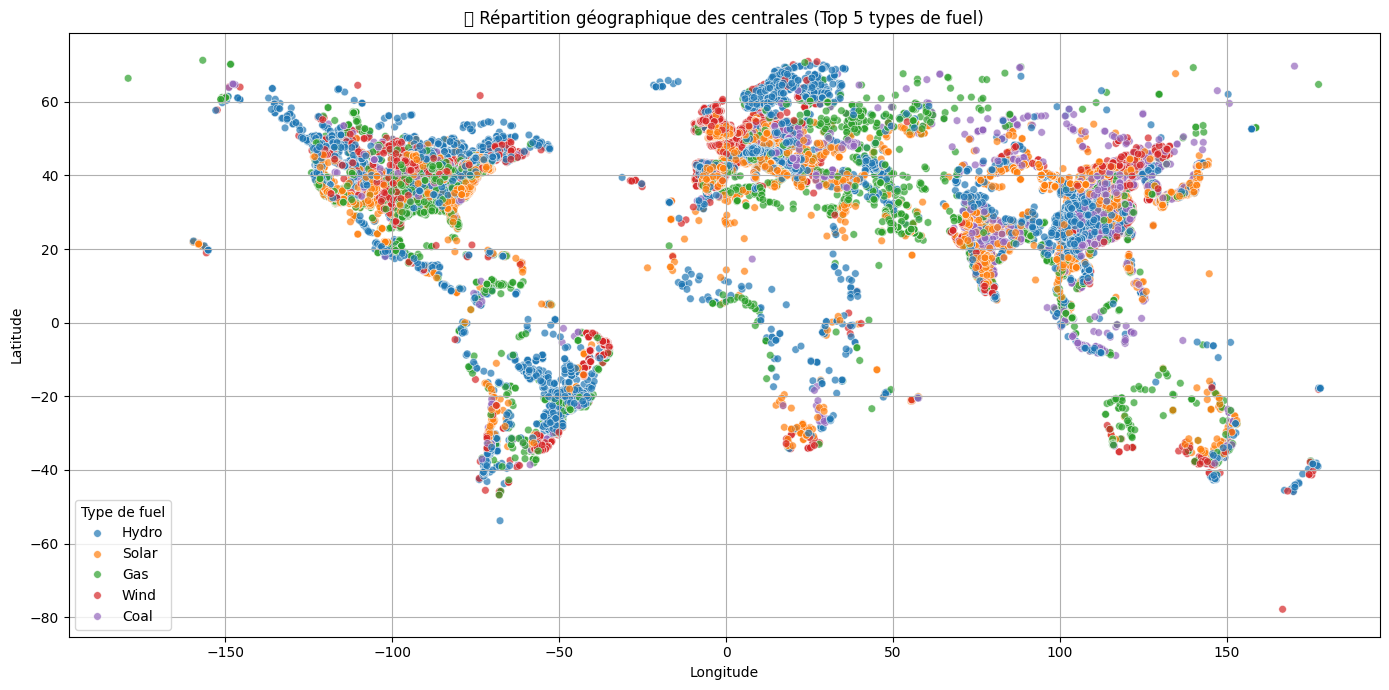

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


df_geo = df.dropna(subset=['latitude', 'longitude', 'primary_fuel'])


top_fuels = df_geo['primary_fuel'].value_counts().head(5).index
df_geo = df_geo[df_geo['primary_fuel'].isin(top_fuels)]


plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=df_geo,
    x='longitude',
    y='latitude',
    hue='primary_fuel',
    alpha=0.7,
    s=30,
    palette='tab10'
)
plt.title("🌍 Répartition géographique des centrales (Top 5 types de fuel)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Type de fuel")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:

pivot_matrix = df.pivot_table(
    values='capacity_mw',
    index='country_long',
    columns='primary_fuel',
    aggfunc='sum',
    fill_value=0
)

print("🔢 Matrice capacité (pays × type de fuel) :")
print(pivot_matrix.head())


🔢 Matrice capacité (pays × type de fuel) :
primary_fuel  Biomass  Coal  Cogeneration       Gas  Geothermal    Hydro  \
country_long                                                               
Afghanistan       0.0   0.0           0.0     42.00         0.0   238.55   
Albania           0.0   0.0           0.0      0.00         0.0  1431.00   
Algeria           0.0   0.0           0.0  15179.00         0.0    24.00   
Angola            0.0   0.0           0.0    163.68         0.0   770.60   
Antarctica        0.0   0.0           0.0      0.00         0.0     0.00   

primary_fuel  Nuclear    Oil  Other  Petcoke  Solar  Storage  Waste  \
country_long                                                          
Afghanistan       0.0    0.0    0.0      0.0   20.0      0.0    0.0   
Albania           0.0    0.0   98.0      0.0    0.0      0.0    0.0   
Algeria           0.0    0.0    0.0      0.0  670.8      0.0    0.0   
Angola            0.0  136.9    0.0      0.0    0.0      0.0    0.0  

In [12]:

pivot_T = pivot_matrix.T


matrix_product = np.dot(pivot_T, pivot_matrix)

print("\n🧮 Produit matriciel fuel x fuel (corrélation indirecte par pays) :")
print(matrix_product[:5, :5])  



🧮 Produit matriciel fuel x fuel (corrélation indirecte par pays) :
[[2.13831735e+08 1.71060386e+09 1.00989766e+07 3.22424683e+09
  2.06894691e+07]
 [1.71060386e+09 1.03153600e+12 2.96575138e+08 2.11295607e+11
  1.09670041e+09]
 [1.00989766e+07 2.96575138e+08 1.01218000e+07 6.59314501e+08
  4.05254640e+06]
 [3.22424683e+09 2.11295607e+11 6.59314501e+08 3.31281635e+11
  2.25191180e+09]
 [2.06894691e+07 1.09670041e+09 4.05254640e+06 2.25191180e+09
  2.38699493e+07]]


In [13]:
from numpy.linalg import eig


cov_matrix = np.cov(pivot_matrix.T)  
eigenvalues, eigenvectors = eig(cov_matrix)

print("\n📈 Valeurs propres (eigenvalues) :")
print(eigenvalues.round(2))

print("\n🔁 Vecteurs propres (eigenvectors, directions principales) :")
print(eigenvectors[:, :3])  



📈 Valeurs propres (eigenvalues) :
[6.96193354e+09 1.70339440e+09 1.04134015e+08 3.52512348e+07
 2.31619189e+07 7.66595521e+06 1.66163456e+06 3.74869710e+05
 5.15566400e+04 3.54075200e+04 1.89183800e+04 9.29727000e+03
 5.79690000e+02 3.11270000e+02 8.60000000e-01]

🔁 Vecteurs propres (eigenvectors, directions principales) :
[[ 2.22438520e-03  9.16999542e-03 -7.54547100e-02]
 [ 9.23155172e-01 -2.81518500e-01  2.51766208e-01]
 [ 3.79967982e-04  1.97985426e-03  9.02207853e-04]
 [ 2.50556188e-01  9.30686233e-01  1.18171783e-01]
 [ 1.37030334e-03  6.59465772e-03  2.43746952e-03]
 [ 2.63648911e-01  4.16480366e-03 -9.43130953e-01]
 [ 6.96373113e-02  1.67968734e-01 -1.45478462e-01]
 [ 1.56039326e-02  7.59424359e-02 -6.59399296e-02]
 [ 2.19407680e-04  1.03864482e-03 -6.29783629e-04]
 [ 8.11203119e-04  3.91711667e-03  1.69247207e-03]
 [ 6.35415575e-02  2.31092563e-02  1.73109764e-02]
 [ 2.86823928e-04  1.42802730e-03  6.32607116e-04]
 [ 3.42677092e-03  1.64360645e-02  7.04895596e-03]
 [ 6.527651

In [14]:
import numpy as np
import pandas as pd


mean_capacity = df['capacity_mw'].mean()
std_capacity = df['capacity_mw'].std()


high_capacity_mask = df['capacity_mw'] > (mean_capacity + std_capacity)


df_high_capacity = df[high_capacity_mask]

print(f"🔍 Nombre de centrales avec capacité > moyenne + 1σ : {len(df_high_capacity)}")


🔍 Nombre de centrales avec capacité > moyenne + 1σ : 2534


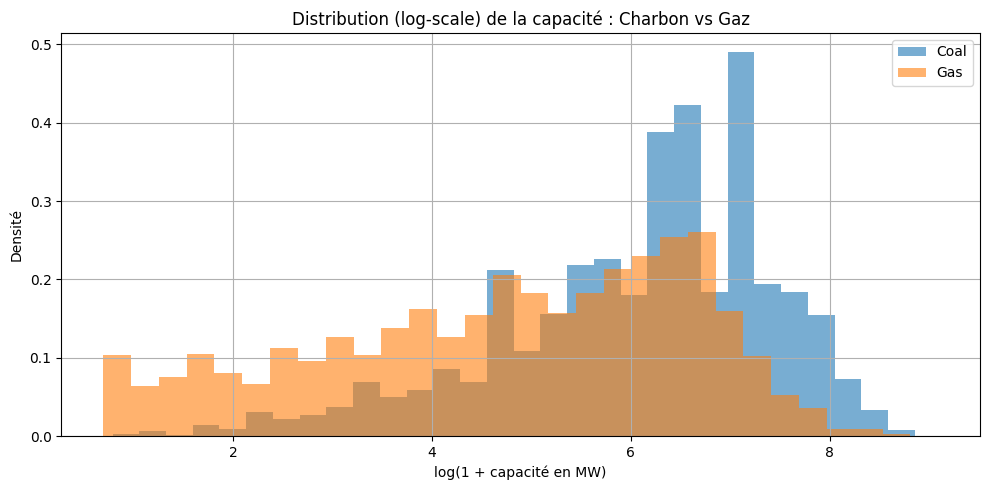

In [15]:
import matplotlib.pyplot as plt



coal_cap = df[df['primary_fuel'] == 'Coal']['capacity_mw']
gas_cap = df[df['primary_fuel'] == 'Gas']['capacity_mw']


log_coal = np.log1p(coal_cap.dropna())
log_gas = np.log1p(gas_cap.dropna())


plt.figure(figsize=(10,5))
plt.hist(log_coal, bins=30, alpha=0.6, label="Coal", density=True)
plt.hist(log_gas, bins=30, alpha=0.6, label="Gas", density=True)
plt.title("Distribution (log-scale) de la capacité : Charbon vs Gaz")
plt.xlabel("log(1 + capacité en MW)")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!git add .
!git commit -m "DC - Analyse des centrales enérgétiques"
!git push origin main